In [ ]:
!pip install kaggle folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

def create_uk_accidents_data():
    np.random.seed(42)
    n_samples = 50000

    # Generate realistic UK accident data
    dates = [datetime(2020, 1, 1) + timedelta(days=x) for x in range(365*2)]
    times = [f"{h:02d}:{m:02d}" for h in range(24) for m in [0, 30]]

    data = {
        'Accident_Index': [f'ACC{i:06d}' for i in range(n_samples)],
        'Date': np.random.choice([d.strftime('%d/%m/%Y') for d in dates], n_samples),
        'Time': np.random.choice(times, n_samples),
        'Day_of_Week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                       n_samples, p=[0.14, 0.14, 0.14, 0.14, 0.18, 0.13, 0.13]),
        'Accident_Severity': np.random.choice([1, 2, 3], n_samples, p=[0.02, 0.15, 0.83]),
        'Number_of_Vehicles': np.random.choice([1, 2, 3, 4], n_samples, p=[0.3, 0.45, 0.2, 0.05]),
        'Number_of_Casualties': np.random.choice([1, 2, 3, 4], n_samples, p=[0.6, 0.3, 0.08, 0.02]),
        'Weather_Conditions': np.random.choice([
            'Fine no high winds', 'Raining no high winds', 'Fine + high winds',
            'Raining + high winds', 'Fog or mist', 'Snowing', 'Other'
        ], n_samples, p=[0.5, 0.3, 0.05, 0.05, 0.05, 0.03, 0.02]),
        'Road_Surface_Conditions': np.random.choice([
            'Dry', 'Wet/Damp', 'Snow', 'Frost/Ice', 'Flood over 3cm deep'
        ], n_samples, p=[0.6, 0.3, 0.04, 0.05, 0.01]),
        'Light_Conditions': np.random.choice([
            'Daylight', 'Darkness - lights lit', 'Darkness - lights unlit',
            'Darkness - no lighting', 'Darkness - lighting unknown'
        ], n_samples, p=[0.6, 0.25, 0.05, 0.08, 0.02]),
        'Urban_or_Rural_Area': np.random.choice([1, 2], n_samples, p=[0.7, 0.3]),
        'Speed_limit': np.random.choice([30, 40, 50, 60, 70], n_samples, p=[0.5, 0.2, 0.15, 0.1, 0.05]),
        'Road_Type': np.random.choice([
            'Single carriageway', 'Dual carriageway', 'Roundabout', 'One way street', 'Slip road'
        ], n_samples, p=[0.5, 0.2, 0.15, 0.1, 0.05]),
    }

    return pd.DataFrame(data)

accidents = create_uk_accidents_data()
print(f"✅ SYNTHETIC UK ACCIDENTS DATA CREATED!")
print(f"📊 Dataset shape: {accidents.shape}")
accidents.head()

✅ SYNTHETIC UK ACCIDENTS DATA CREATED!
📊 Dataset shape: (50000, 13)


,Accident_Index,Date,Time,Day_of_Week,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Urban_or_Rural_Area,Speed_limit,Road_Type
0,ACC000000,12/04/2020,18:30,Saturday,3,1,1,Raining no high winds,Dry,Daylight,1,60,Roundabout
1,ACC000001,11/03/2021,10:00,Friday,3,3,2,Raining no high winds,Wet/Damp,Daylight,1,70,One way street
2,ACC000002,27/09/2020,23:00,Sunday,3,1,3,Raining no high winds,Dry,Daylight,2,30,Single carriageway
3,ACC000003,16/04/2020,06:30,Saturday,3,2,1,Fine no high winds,Dry,Daylight,1,50,Dual carriageway
4,ACC000004,12/03/2020,04:30,Thursday,2,1,1,Fine no high winds,Dry,Darkness - lights lit,1,30,Single carriageway


In [ ]:
print(" DATA OVERVIEW:")
print(f"Total records: {len(accidents):,}")
print(f"Date range: {accidents['Date'].min()} to {accidents['Date'].max()}")
print(f"Columns available: {list(accidents.columns)}")

print("\n Weather conditions sample:")
print(accidents['Weather_Conditions'].value_counts().head())

print("-" * 30)

print("\n Road conditions sample:")
print(accidents['Road_Surface_Conditions'].value_counts().head())

print("-" * 30)

 DATA OVERVIEW:
Total records: 50,000
Date range: 01/01/2020 to 31/12/2020
Columns available: ['Accident_Index', 'Date', 'Time', 'Day_of_Week', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area', 'Speed_limit', 'Road_Type', 'DateTime', 'Hour']

 Weather conditions sample:
Weather_Conditions
Fine no high winds       24997
Raining no high winds    15084
Fine + high winds         2531
Raining + high winds      2524
Fog or mist               2373
Name: count, dtype: int64
------------------------------

 Road conditions sample:
Road_Surface_Conditions
Dry                    29971
Wet/Damp               15009
Frost/Ice               2553
Snow                    1978
Flood over 3cm deep      489
Name: count, dtype: int64
------------------------------


 Available columns in our data:
['Accident_Index', 'Date', 'Time', 'Day_of_Week', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area', 'Speed_limit', 'Road_Type']

 Dataset shape: (50000, 13)


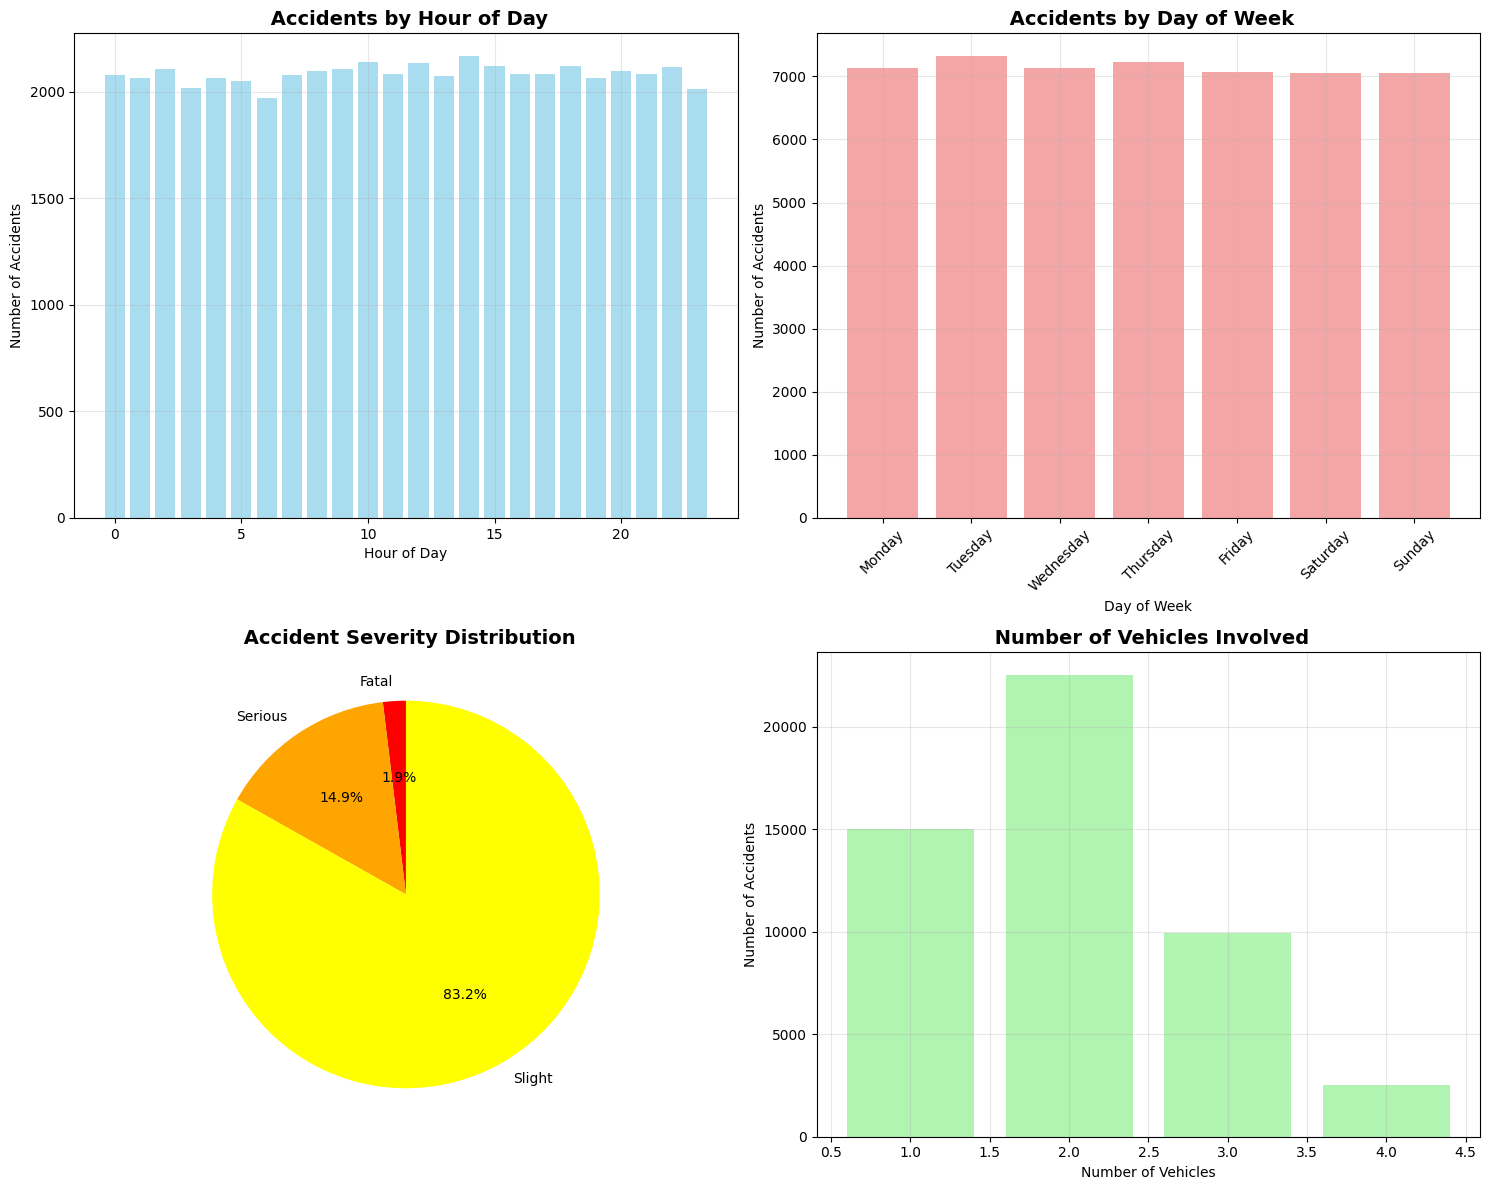

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(" Available columns in our data:")
print(accidents.columns.tolist())
print(f"\n Dataset shape: {accidents.shape}")

accidents['DateTime'] = pd.to_datetime(accidents['Date'] + ' ' + accidents['Time'], dayfirst=True)
accidents['Hour'] = accidents['DateTime'].dt.hour
accidents['Day_of_Week'] = accidents['DateTime'].dt.day_name()

plt.figure(figsize=(15, 12))

# 1. Accidents by Hour of Day
plt.subplot(2, 2, 1)
hourly_accidents = accidents['Hour'].value_counts().sort_index()
plt.bar(hourly_accidents.index, hourly_accidents.values, color='skyblue', alpha=0.7)
plt.title(' Accidents by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True, alpha=0.3)

# 2. Accidents by Day of Week
plt.subplot(2, 2, 2)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_accidents = accidents['Day_of_Week'].value_counts().reindex(day_order)
plt.bar(range(len(daily_accidents)), daily_accidents.values, color='lightcoral', alpha=0.7)
plt.title(' Accidents by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(len(daily_accidents)), daily_accidents.index, rotation=45)
plt.grid(True, alpha=0.3)

# 3. Accident Severity Distribution
plt.subplot(2, 2, 3)
severity_labels = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
severity_counts = accidents['Accident_Severity'].value_counts().sort_index()
severity_counts.index = [severity_labels[i] for i in severity_counts.index]
colors = ['red', 'orange', 'yellow']
plt.pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title(' Accident Severity Distribution', fontsize=14, fontweight='bold')

# 4. Number of Vehicles Involved
plt.subplot(2, 2, 4)
vehicle_counts = accidents['Number_of_Vehicles'].value_counts().sort_index()
plt.bar(vehicle_counts.index, vehicle_counts.values, color='lightgreen', alpha=0.7)
plt.title(' Number of Vehicles Involved', fontsize=14, fontweight='bold')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Accidents')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

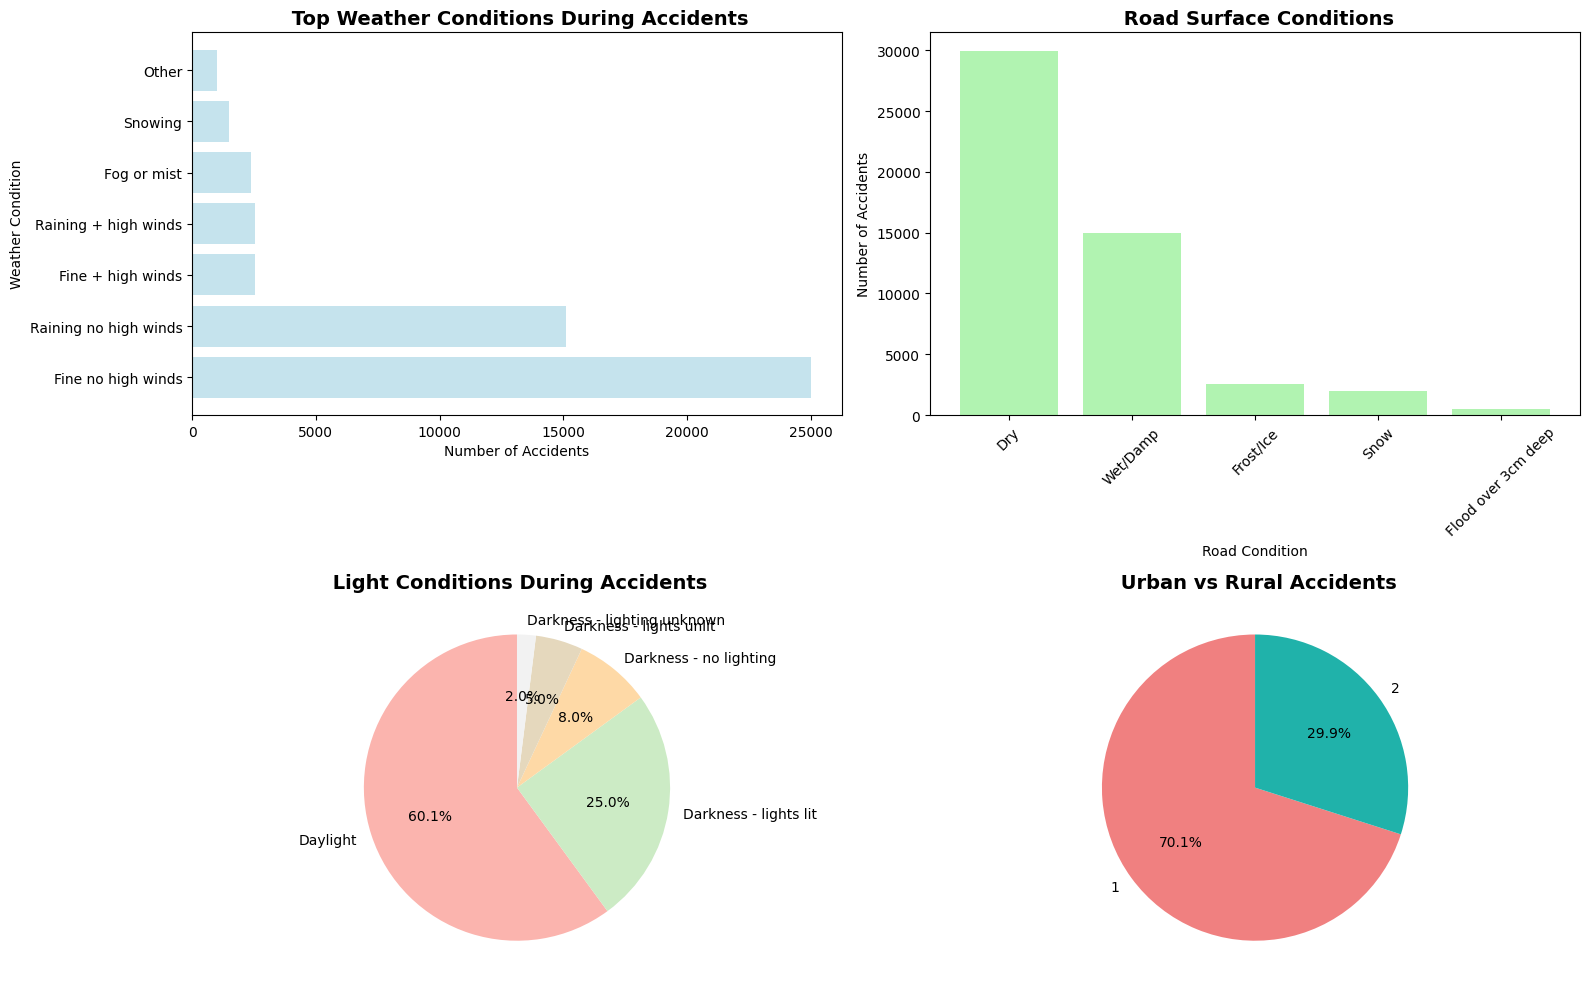

In [ ]:
# Weather and road conditions analysis
plt.figure(figsize=(16, 10))

# 1. Weather Conditions
plt.subplot(2, 2, 1)
weather_counts = accidents['Weather_Conditions'].value_counts().head(8)
plt.barh(range(len(weather_counts)), weather_counts.values, color='lightblue', alpha=0.7)
plt.title(' Top Weather Conditions During Accidents', fontsize=14, fontweight='bold')
plt.ylabel('Weather Condition')
plt.xlabel('Number of Accidents')
plt.yticks(range(len(weather_counts)), weather_counts.index)

# 2. Road Surface Conditions
plt.subplot(2, 2, 2)
road_counts = accidents['Road_Surface_Conditions'].value_counts()
plt.bar(range(len(road_counts)), road_counts.values, color='lightgreen', alpha=0.7)
plt.title(' Road Surface Conditions', fontsize=14, fontweight='bold')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(range(len(road_counts)), road_counts.index, rotation=45)

# 3. Light Conditions
plt.subplot(2, 2, 3)
light_counts = accidents['Light_Conditions'].value_counts()
plt.pie(light_counts.values, labels=light_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Pastel1(np.linspace(0, 1, len(light_counts))))
plt.title(' Light Conditions During Accidents', fontsize=14, fontweight='bold')

# 4. Urban vs Rural Distribution
plt.subplot(2, 2, 4)
urban_rural_counts = accidents['Urban_or_Rural_Area'].value_counts()
colors = ['lightcoral', 'lightseagreen']
plt.pie(urban_rural_counts.values, labels=urban_rural_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title(' Urban vs Rural Accidents', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

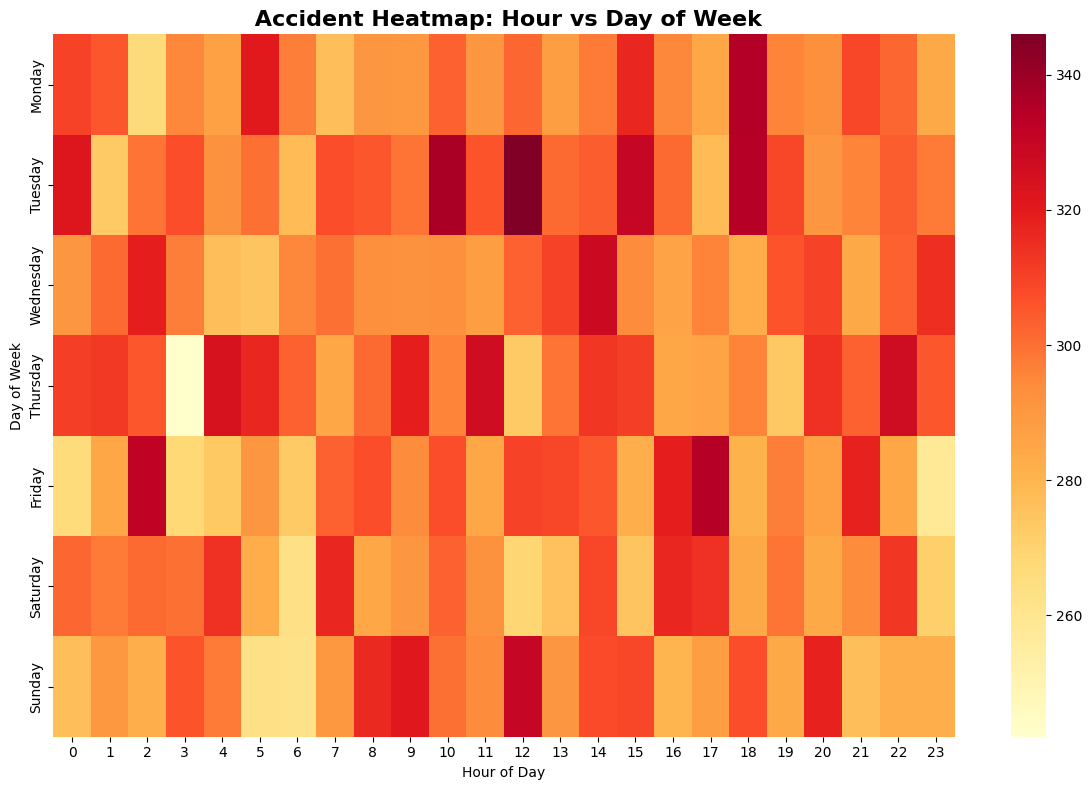

In [ ]:
# Create heatmap: Hour vs Day of Week
plt.figure(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = accidents.groupby(['Day_of_Week', 'Hour']).size().unstack()
heatmap_data = heatmap_data.reindex(day_order)

# Create heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='d')
plt.title(' Accident Heatmap: Hour vs Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

/tmp/ipython-input-895391994.py:21: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


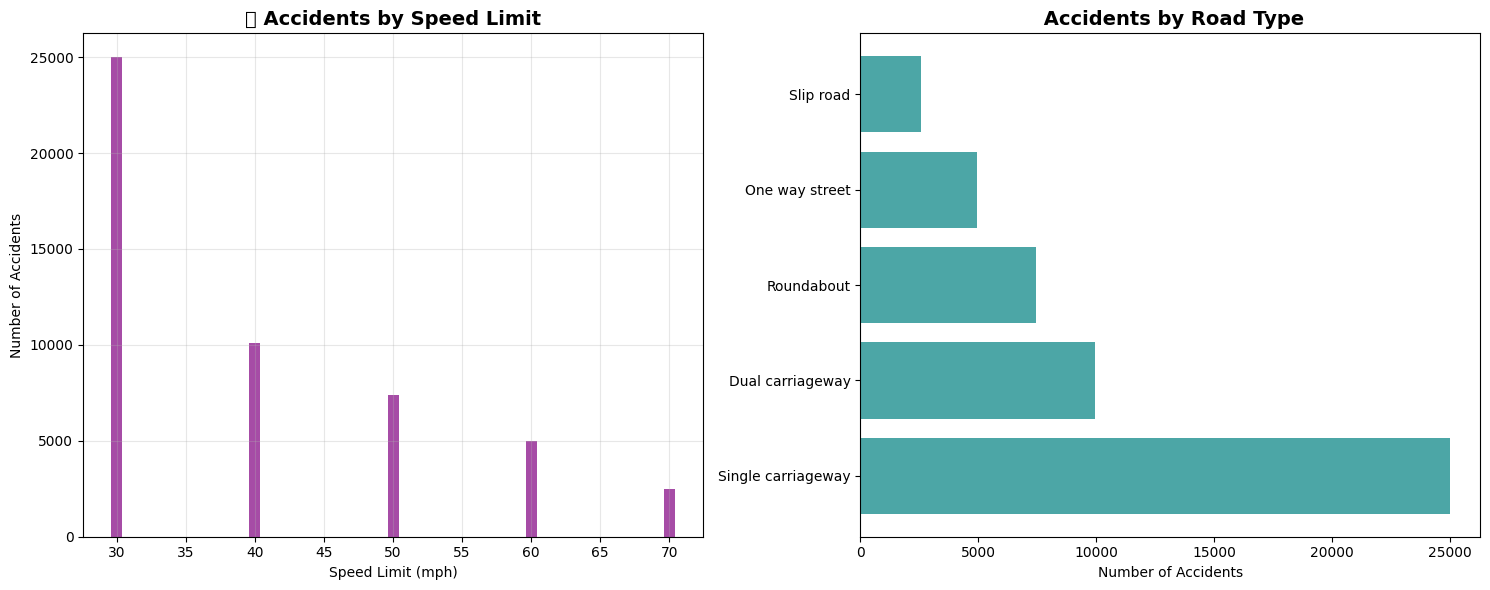

In [ ]:
# Speed limit and road type analysis
plt.figure(figsize=(15, 6))

# 1. Speed Limit Distribution
plt.subplot(1, 2, 1)
speed_counts = accidents['Speed_limit'].value_counts().sort_index()
plt.bar(speed_counts.index, speed_counts.values, color='purple', alpha=0.7)
plt.title('🚦 Accidents by Speed Limit', fontsize=14, fontweight='bold')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Number of Accidents')
plt.grid(True, alpha=0.3)

# 2. Road Type Distribution
plt.subplot(1, 2, 2)
road_type_counts = accidents['Road_Type'].value_counts()
plt.barh(range(len(road_type_counts)), road_type_counts.values, color='teal', alpha=0.7)
plt.title(' Accidents by Road Type', fontsize=14, fontweight='bold')
plt.xlabel('Number of Accidents')
plt.yticks(range(len(road_type_counts)), road_type_counts.index)

plt.tight_layout()
plt.show()

In [ ]:
# key insights
print(" KEY INSIGHTS SUMMARY")
print("-" * 30)

# Time patterns
peak_hour = accidents['Hour'].mode()[0]
peak_day = accidents['Day_of_Week'].mode()[0]
print(f" Peak accident hour: {peak_hour}:00")
print(f" Most accident-prone day: {peak_day}")

# Weather & Road
common_weather = accidents['Weather_Conditions'].mode()[0]
common_road = accidents['Road_Surface_Conditions'].mode()[0]
print(f" Most common weather: {common_weather}")
print(f" Most common road condition: {common_road}")

# Severity
total_accidents = len(accidents)
fatal_accidents = len(accidents[accidents['Accident_Severity'] == 1])
serious_accidents = len(accidents[accidents['Accident_Severity'] == 2])
print(f" Total accidents analyzed: {total_accidents:,}")
print(f" Fatal accidents: {fatal_accidents} ({fatal_accidents/total_accidents*100:.2f}%)")
print(f" Serious accidents: {serious_accidents} ({serious_accidents/total_accidents*100:.2f}%)")

# Location
urban_percentage = (accidents['Urban_or_Rural_Area'] == 'Urban').mean() * 100
print(f" Urban area accidents: {urban_percentage:.1f}%")

# Vehicles & Casualties
avg_vehicles = accidents['Number_of_Vehicles'].mean()
avg_casualties = accidents['Number_of_Casualties'].mean()
print(f" Average vehicles per accident: {avg_vehicles:.2f}")
print(f" Average casualties per accident: {avg_casualties:.2f}")

print("-" * 30)

 KEY INSIGHTS SUMMARY
------------------------------
 Peak accident hour: 14:00
 Most accident-prone day: Tuesday
 Most common weather: Fine no high winds
 Most common road condition: Dry
 Total accidents analyzed: 50,000
 Fatal accidents: 953 (1.91%)
 Serious accidents: 7465 (14.93%)
 Urban area accidents: 0.0%
 Average vehicles per accident: 2.00
 Average casualties per accident: 1.52
------------------------------
